# Get branch support using bootstrap

Bootstrapping is the most common method for assessing branch support, applicable to distance-based, parsimony, and maximum likelihood trees. It's a resampling technique that gauges how consistently the data supports each clade.
We can use Felsenstein's bootstrapping method to determine the tree's branch confidence. see details at [this paper](https://nam10.safelinks.protection.outlook.com/?url=https%3A%2F%2Fwww.pnas.org%2Fdoi%2F10.1073%2Fpnas.93.23.13429&data=05%7C02%7Chaotianzh%40uconn.edu%7C30682fbeab9e43da8fda08ddfb7a4cb4%7C17f1a87e2a254eaab9df9d439034b080%7C0%7C0%7C638943224871754860%7CUnknown%7CTWFpbGZsb3d8eyJFbXB0eU1hcGkiOnRydWUsIlYiOiIwLjAuMDAwMCIsIlAiOiJXaW4zMiIsIkFOIjoiTWFpbCIsIldUIjoyfQ%3D%3D%7C0%7C%7C%7C&sdata=RP0ZeGEYBvIeuyLIimRL0umOeZ%2FrG%2FkQGXv0%2Ftv4Zk4%3D&reserved=0).

### Example 1


Load our toy example and run ScisTree2.

In [1]:
import scistree2 as s2
import numpy as np 
import pandas as pd
from phytreeviz import TreeViz # for tree visuaization


gp = s2.probability.from_csv('./data/toy_probs.csv')
caller = s2.ScisTree2(threads=8) # use 8 threads
tree, imputed_genotype, likelihood = caller.infer(gp) # run Scistree2 inference

Bootstrapping on the inferred tree.

In [2]:
tree = caller.bootstrap(tree, gp, num_bootstrap=100)
print(tree.output(branch_length_func=lambda x: x.branch_confidence))

(((cell1:1.0,cell3:1.0):0.97,(cell2:1.0,cell4:1.0):0.59):0.0,cell5:1.0):1.0;


Plot the bootstrapping tree with the number of mutations and branch confidence on branches.

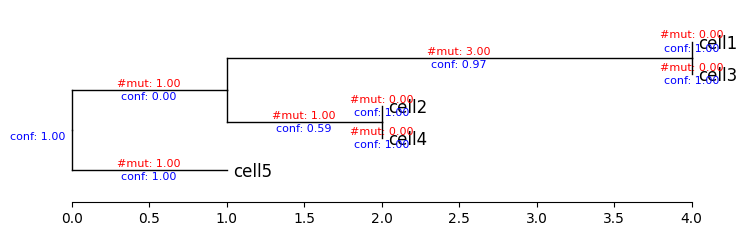

In [3]:
tv = TreeViz(tree.output(branch_length_func=lambda x: len(x.mutations), confidence_func=lambda x: x.branch_confidence))
tv.show_branch_length(color='red', label_formatter=lambda v: f"#mut: {v:.2f}")
tv.show_confidence(color='blue', label_formatter=lambda v: f"conf: {v:.2f}")
tv.show_scale_axis()
fig = tv.plotfig()

### Example 2

Load a larger dataset and run ScisTree2.

In [4]:
gp = s2.probability.from_csv('./data/toy_raw_reads.csv', source='read')
caller_spr = s2.ScisTree2(threads=8)
tree_spr, imputed_genotype_spr, likelihood_spr = caller_spr.infer(gp)

Evaluate branch confidence.

In [5]:
tree_spr_bootstrap = caller_spr.bootstrap(tree_spr, gp)
print(tree_spr_bootstrap.output(branch_length_func=lambda x: x.branch_confidence))

((((((((((((cell24:1.0,cell43:1.0):0.62,cell22:1.0):0.2,cell39:1.0):0.1,((cell15:1.0,cell46:1.0):0.12,cell40:1.0):0.06):0.08,((((cell49:1.0,cell5:1.0):0.18,cell28:1.0):0.22,cell3:1.0):0.17,(cell32:1.0,cell4:1.0):0.47):0.0):0.0,cell19:1.0):0.0,cell8:1.0):0.0,((((cell13:1.0,cell38:1.0):0.56,cell21:1.0):0.34,cell20:1.0):0.29,cell42:1.0):0.47):0.02,(((cell31:1.0,cell41:1.0):0.4,cell25:1.0):0.21,cell23:1.0):0.33):0.1,cell44:1.0):0.34,cell29:1.0):1.0,(((((((((cell16:1.0,cell17:1.0):0.16,(cell27:1.0,cell2:1.0):0.17):0.05,cell30:1.0):0.08,cell11:1.0):0.18,((cell14:1.0,cell26:1.0):0.42,cell47:1.0):0.26):0.3,cell48:1.0):0.15,((((cell36:1.0,cell9:1.0):0.36,cell1:1.0):0.14,cell6:1.0):0.1,((cell0:1.0,cell34:1.0):0.56,(cell33:1.0,cell45:1.0):0.53):0.38):0.03):0.0,((((cell10:1.0,cell12:1.0):0.56,cell37:1.0):0.78,cell35:1.0):0.55,cell18:1.0):0.6):0.29,cell7:1.0):1.0):1.0;


Plot the tree, darker nodes show higher confidence.

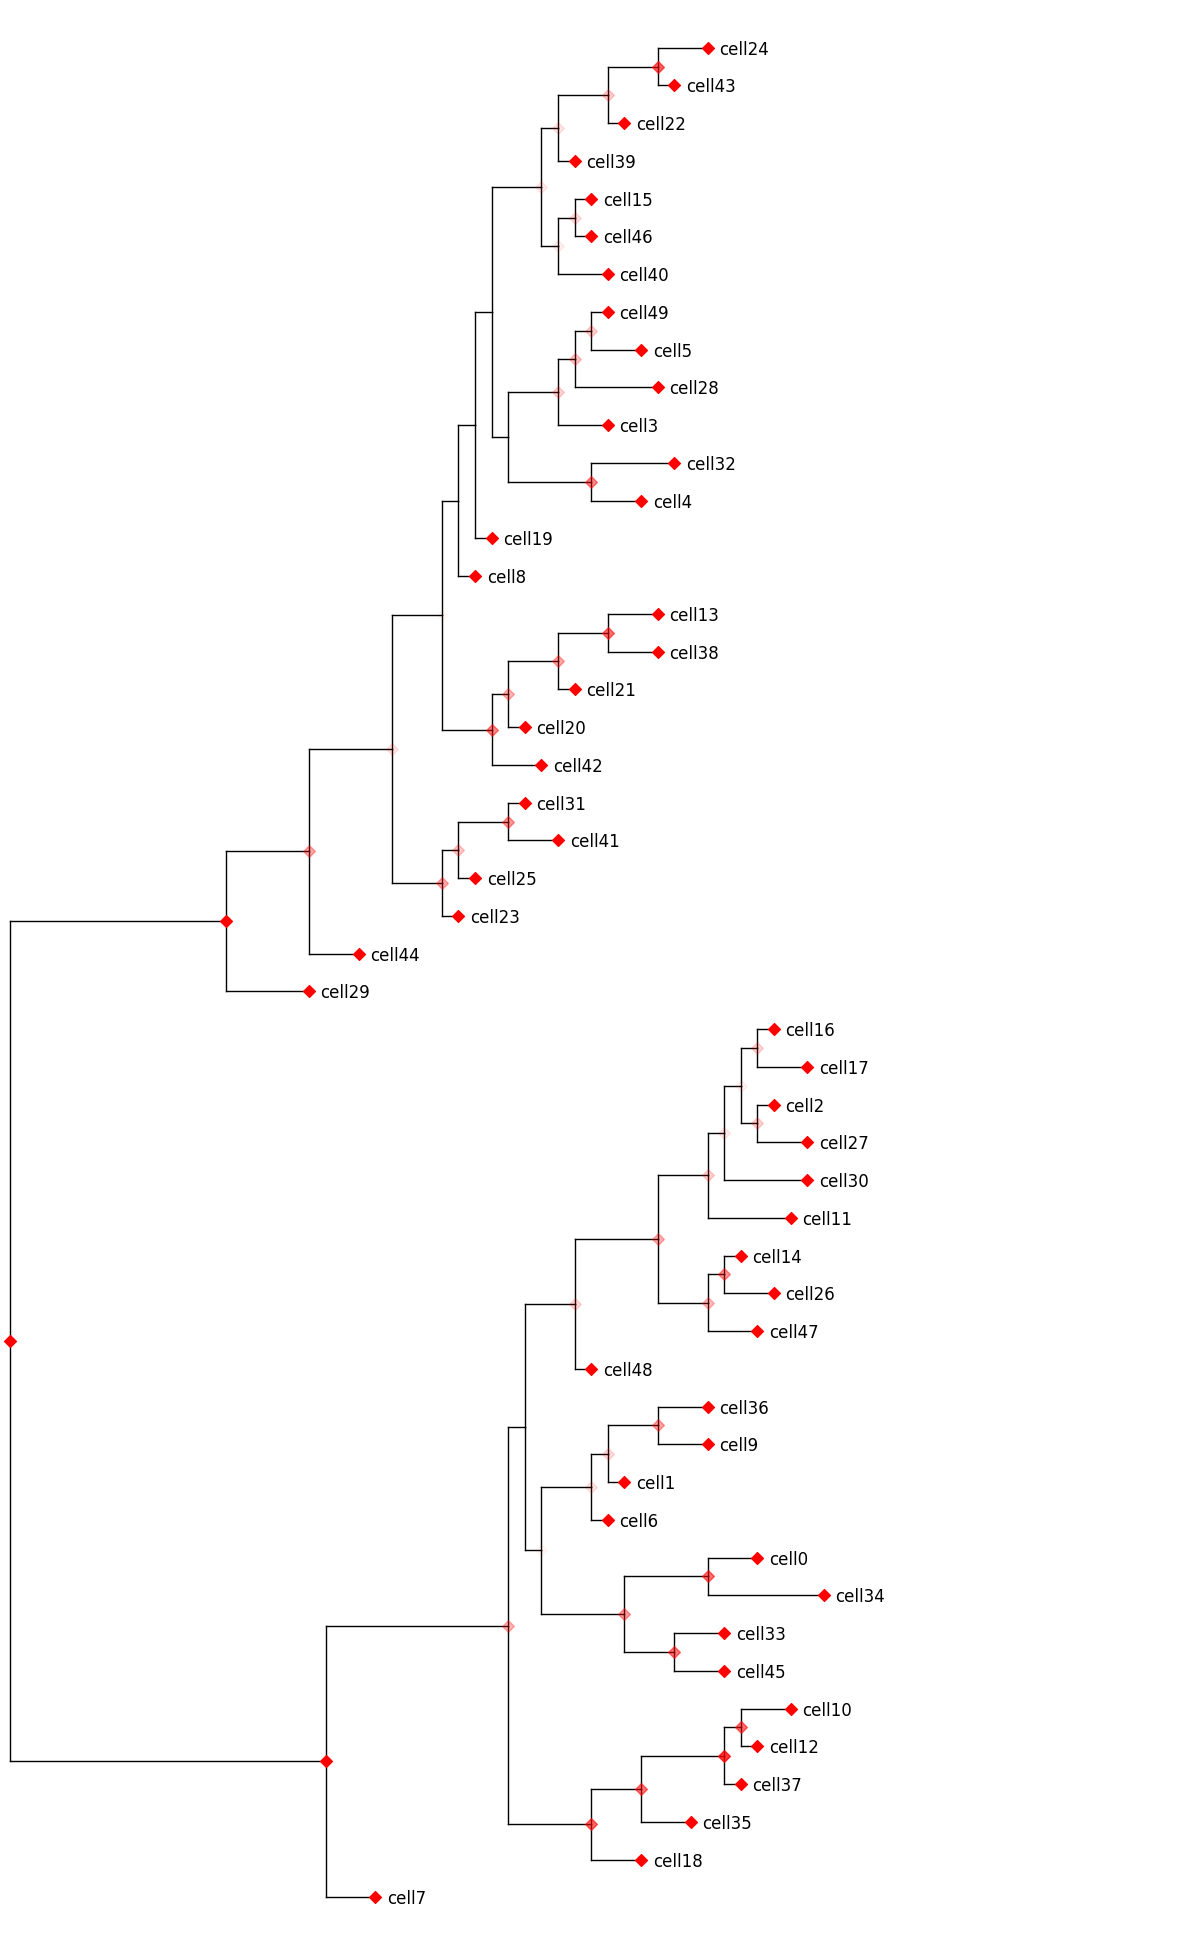

In [6]:
# add 0.5 to each branch to avoid 0 length.
tv = TreeViz(tree_spr_bootstrap.output(branch_length_func=lambda x: len(x.mutations)+0.5, confidence_func=lambda x: x.branch_confidence), width=15)
# tv.show_confidence(bbox=dict(facecolor='red', alpha=0.5))
for node in tree_spr_bootstrap.get_all_nodes():
    leaf_names = [leaf.name for leaf in tree_spr_bootstrap[node].get_leaves()]
    tv.marker(leaf_names, marker="D", color='red', alpha=tree_spr_bootstrap[node].branch_confidence)
fig = tv.plotfig()